In [19]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets
import torch

In [2]:
mnist_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(0.5, 1.0),])

In [3]:
trainset = datasets.MNIST('./train', 
                          train=True, 
                          download=True, 
                          transform=mnist_transforms)

testset = datasets.MNIST('./train', 
                          train=False, 
                          download=True, 
                          transform=mnist_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./train/MNIST/raw/train-images-idx3-ubyte.gz to ./train/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./train/MNIST/raw/train-labels-idx1-ubyte.gz to ./train/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./train/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./train/MNIST/raw



In [4]:
train_loader = DataLoader(trainset, 
                          batch_size=8, 
                          shuffle=True,
                          num_workers=2)
test_loader = DataLoader(testset, 
                          batch_size=8, 
                          shuffle=False,
                          num_workers=2)

In [5]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

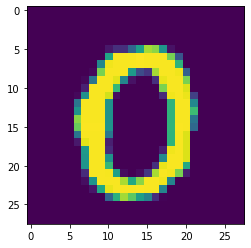

In [6]:
torch_image = torch.squeeze(images[0])

import matplotlib.pyplot as plt
plt.imshow(torch_image)

In [7]:
import torch.nn as nn

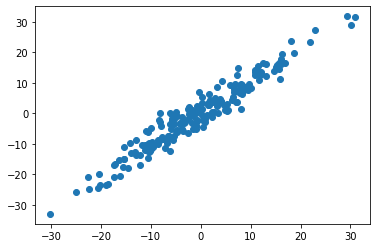

In [8]:
import torch.nn.functional as F

# pool = F.max_pool2d()

X = torch.randn(200, 1) * 10
y = X + 3 * torch.randn(200, 1)

plt.scatter(X.numpy(), y.numpy())

In [9]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()

    self.lin = nn.Linear(1, 1)

  def forward(self, x):
    pred = self.lin(x)
    return pred

In [10]:
model = Model()
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.3838]], requires_grad=True), Parameter containing:
tensor([0.4818], requires_grad=True)]


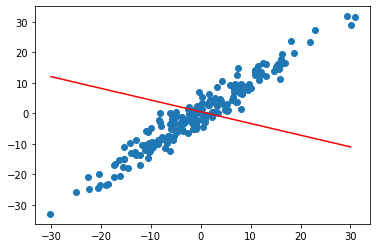

In [12]:
import numpy as np

w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1
plt.plot(x1, y1, 'r')
plt.scatter(X, y)

In [14]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [15]:
EPOCHS = 100

losses = []

for epoch in range(EPOCHS):
  optimizer.zero_grad()

  y_pred = model(X)
  loss = criterion(y_pred, y)
  losses.append(loss.item())

  loss.backward()

  optimizer.step()

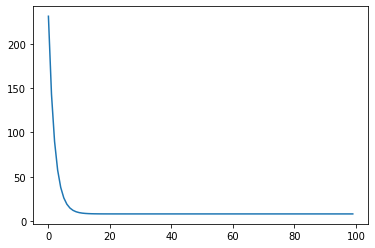

In [16]:
plt.plot(range(EPOCHS), losses)

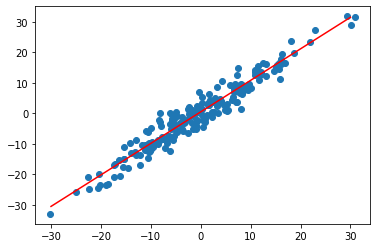

In [17]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1
plt.plot(x1, y1, 'r')
plt.scatter(X, y)

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [20]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

In [21]:
trainset = datasets.FashionMNIST('./',
                                 train=True,
                                 download=True,
                                 transform=transform)

testset = datasets.FashionMNIST('./',
                                 train=False,
                                 download=True,
                                 transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [22]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [23]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

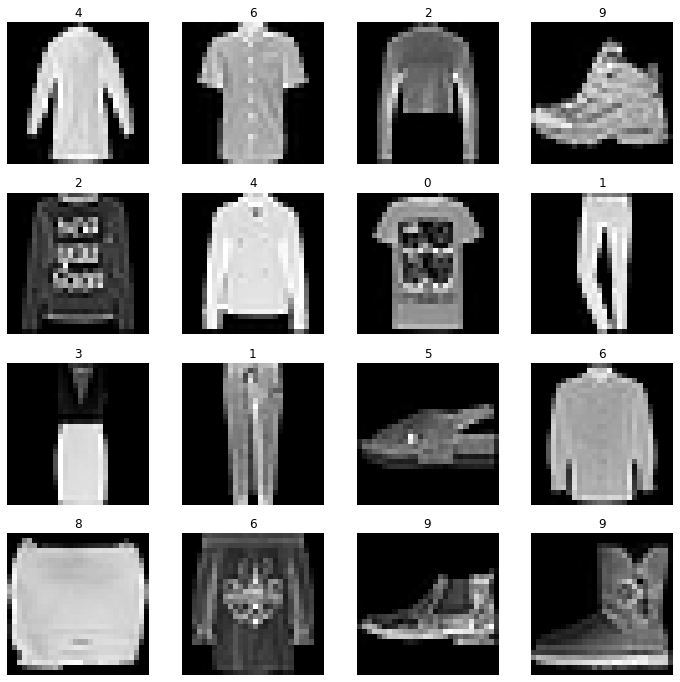

In [24]:
fig = plt.figure(figsize=(12, 12))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
  image = images[i].squeeze()
  label_idx = labels[i].item()

  fig.add_subplot(rows, cols, i)
  plt.title(label_idx)
  plt.axis('off')
  plt.imshow(image, cmap='gray')